# Data analysis recipes: Fitting a model to data by David W. Hogg

(educational purpose only)

- fitting a model to data
(if a relationship looks lin- ear, unless there is a confidently held theoretical reason to believe that the data are generated from a linear relationship, it probably isn’t linear in detail; in these cases fitting with a linear model can introduce substantial system- atic error, or generate apparent inconsistencies among experiments that are intrinsically consistent.)

***Note:*** It can also sometimes be useful to fit a simple model to predict new data, given existing data, even in the absence of a physical justification for the fit.

***objectives:*** promote an understanding that if the data can be modeled statistically
 - below simple, straightforward, comprehensible, and—above all—justifiable methods for fit- ting a straight line to data with general, non-trivial, and uncertain properties.
 - focus is on the specific problems of linear fitting that we so often face
 
## Standard practice
linear algebra justification starts by noting that you want to solve the equation:
$$ Y = AX $$
but you can’t because that equation is over-constrained. So, you weight everything with the inverse of the covariance matrix and then left-multiply everything by $A^T$ to reduce the dimensionality. Then solution of that reduced-dimensionality equation:
$$ X = [A^T C^{-1} A]^{-1} [A^T C^{-1} Y] $$
it minimizes an objective function $\chi^2$, (“chi-squared”) which is the total squared error, scaled by the uncertainties.

$$ \chi^2 = \sum_{i=1}^N \frac{[y_i - f(x_i)]^2}{\sigma_{y_i}^2} = [Y - AX]^T C^{-1} [Y - AX] $$
This, of course, is only one possible meaning of the phrase “best fit”
This is actually the simplest thing to write that is linear, obeys matrix multiplication rules, and has the right relative sensitivity to data of different statistical significance.

Section 4: When the uncertainties are Gaussian and their variances σyi are correctly estimated, the matrix $[A^T C^{-1} A]^{-1}$ is just the covariance matrix (Gaussian uncertainty—uncertainty not error — variances on the diagonal, covariances off the diagonal) for the parameters in X.

==============================================================

$$y = mx + b $$
$$\begin{bmatrix}
    b  \\
    m
\end{bmatrix}
=
X = [A^T C^{-1} A]^{-1} [A^T C^{-1} Y] $$

In [1]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
import scipy.optimize as opt

###Table 1 (from Page 6)

| ID | x | y | 𝜎y | 𝜎x | ρxy |
| --- | --- | --- | --- | --- | --- |
| 1 | 201 | 592 | 61 | 9 | -0.84 |
| 2 | 244 | 401 | 25 | 4 | 0.31 |
| 3 | 47 | 583 | 38 | 11 | 0.64 |
| 4 | 287 | 402 | 15 | 7 | -0.27 |
| 5 | 203 | 495 | 21 | 5 | -0.33 |
| 6 | 58 | 173 | 15 | 9 | 0.67 |
| 7 | 210 | 479 | 27 | 4 | -0.02 |
| 8 | 202 | 504 | 14 | 4 | -0.05 |
| 9 | 198 | 510 | 30 | 11 | -0.84 |
| 10 | 158 | 416 | 16 | 7 | -0.69 |
| 11 | 165 | 393 | 14 | 5 | 0.30 |
| 12 | 201 | 442 | 25 | 5 | -0.46 |
| 13 | 157 | 317 | 52 | 5 | -0.03 |
| 14 | 131 | 311 | 16 | 6 | 0.50 |
| 15 | 166 | 400 | 34 | 6 | 0.73 |
| 16 | 160 | 337 | 31 | 5 | -0.52 |
| 17 | 186 | 423 | 42 | 9 | 0.90 |
| 18 | 125 | 334 | 26 | 8 | 0.40 |
| 19 | 218 | 533 | 16 | 6 | -0.78 |
| 20 | 146 | 344 | 22 | 5 | -0.56 |

In [2]:
# Data from Table 1 on page 6

X = np.array([201, 244, 47, 287, 203, 58, 210, 202, 198, 158, 165, 201, 157, 131, 166, 160, 186, 125, 218, 146], dtype = float)
Y = np.array([592, 401, 583, 402, 495, 173, 479, 504, 510, 416, 393, 442, 317, 311, 400, 337, 423, 334, 533, 344], dtype = float)
sigma_Y = np.array([61, 25, 38, 15, 21, 15, 27, 14, 30, 16, 14, 25, 52, 16, 34, 31, 42, 26, 16, 22], dtype = float)
sigma_X = np.array([9, 4, 11, 7, 5, 9, 4, 4, 11, 7, 5, 5, 5, 6, 6, 5, 9, 8, 6, 5], dtype = float)
rho_XY = np.array([-0.84, 0.31, 0.64, -0.27, -0.33, 0.67, -0.02, -0.05, -0.84, -0.69, 0.30, -0.46, -0.03, 0.50, 0.73, -0.52, 0.90, 0.40, -0.78, -0.56], dtype = float)

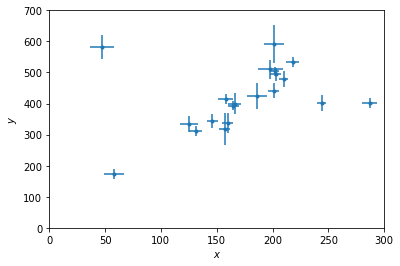

In [3]:
#No correlations $\rho_{xy}$ are shown in the plot below.
plt.errorbar(X, Y, xerr = sigma_X, yerr = sigma_Y, marker = ".", linestyle = "");
plt.xlabel("$x$"); plt.ylabel("$y$");
plt.xlim(0, 300);  plt.ylim(0, 700);

**Exercise 1: Analytical linear least squares without outliers**

Using the standard linear algebra method, fit the straight line $y = mx + b$ to the x, y, and  $\sigma_y$ values for data points 5 through 20 in Table 1 on paper page 6. That is, ignore the first four data points, and also ignore the columns for $\sigma_x$ and $\rho_xy$. Make a plot showing the points, their uncertainties, and the best-fit line. Plot should end up looking like Figure 1. What is the standard uncertainty variance $\sigma_m^2$ on the slope of the line?

y = b + m x = (2.239921 +/- 0.107780) x + (34.047728 +/- 18.246167)


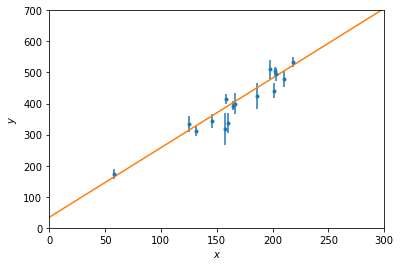

In [6]:
Y1 = Y[4:]
A1 = np.column_stack([np.ones_like(X[4:]), X[4:]])
C1 = np.diag(sigma_Y[4:]**2)

# This will return matrix product of two array => (A1.T @ inv(C1))

X1 = inv(A1.T @ inv(C1) @ A1) @ (A1.T @ inv(C1) @ Y1)
S1 = inv(A1.T @ inv(C1) @ A1)
print("y = b + m x = (%f +/- %f) x + (%f +/- %f)" % (X1[1], np.sqrt(S1[1][1]), 
                                                 X1[0], np.sqrt(S1[0][0])))

plt.errorbar(X[4:], Y[4:], yerr = sigma_Y[4:], marker = ".", linestyle = "");
plt.xlabel("$x$"); plt.ylabel("$y$");
plt.xlim(0, 300);  plt.ylim(0, 700);
x = np.linspace(0, 300)
A = np.column_stack([np.ones_like(x), x])
y = A @ X1
plt.plot(x, y);

**Exercise 2: Analytical linear least squares with outliers**

Repeat Exercise 1 but for all the data points in Table 1 on page 6. Your plot should end up looking like Figure 2. What is the standard uncertainty variance $\sigma_m^2$ on the slope of the line? Is there anything you don’t like about the result? Is there anything different about the new points you have included beyond those used in Exercise 1?

y = b + m x = (1.076748 +/- 0.077407) x + (213.273492 +/- 14.394033)


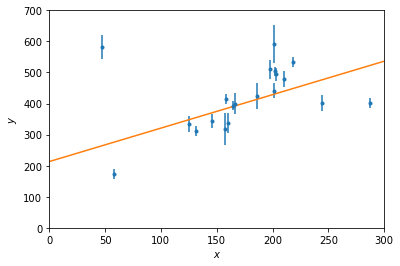

In [7]:
A2 = np.column_stack([np.ones_like(X), X])
C2 = np.diag(sigma_Y**2)


X2 = inv(A2.T @ inv(C2) @ A2) @ (A2.T @ inv(C2) @ Y)
S2 = inv(A2.T @ inv(C2) @ A2)
print("y = b + m x = (%f +/- %f) x + (%f +/- %f)" % (X2[1], np.sqrt(S2[1][1]), 
                                                 X2[0], np.sqrt(S2[0][0])))

plt.errorbar(X, Y, yerr = sigma_Y, marker = ".", linestyle = "");
plt.xlabel("$x$"); plt.ylabel("$y$");
plt.xlim(0, 300);  plt.ylim(0, 700);
x = np.linspace(0, 300)
A = np.column_stack([np.ones_like(x), x])
y = A @ X2
plt.plot(x, y);

**Exercise 3: Analytical quadratic solution with outliers**

Generalize the method of this Section to fit a general quadratic (second order) relationship. Add another column to matrix A containing the values $x_i^2$ , and another element to vector X (call it q). Then re-do Exercise 1 but fitting for and plotting the best quadratic relationship
$$g(x) = q x^2 + mx + b $$
Your plot should end up looking like Figure 3.

q x**2 + m x + b = (0.002299 +/- 0.002034) x**2 + (1.596050 +/- 0.579748) x + (72.894626 +/- 38.911555)


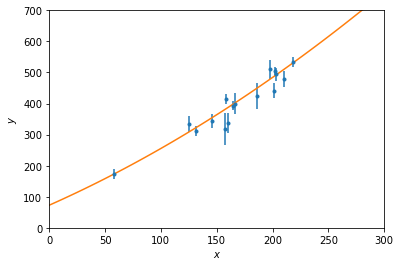

In [8]:
Y3 = Y[4:]
A3 = np.column_stack([np.ones_like(X[4:]), X[4:], X[4:]**2])
C3 = np.diag(sigma_Y[4:]**2)

X3 = inv(A3.T @ inv(C3) @ A3) @ (A3.T @ inv(C3) @ Y3)
S3 = inv(A3.T @ inv(C3) @ A3)
print("q x**2 + m x + b = (%f +/- %f) x**2 + (%f +/- %f) x + (%f +/- %f)" % (X3[2], np.sqrt(S3[2][2]),
                                                                             X3[1], np.sqrt(S3[1][1]),
                                                                             X3[0], np.sqrt(S3[0][0])))

plt.errorbar(X[4:], Y[4:], yerr = sigma_Y[4:], marker = ".", linestyle = "");
plt.xlabel("$x$"); plt.ylabel("$y$");
plt.xlim(0, 300);  plt.ylim(0, 700);
x = np.linspace(0, 300)
A = np.column_stack([np.ones_like(x), x, x**2])
y = A @ X3
plt.plot(x, y);

## The objective function

The frequency distribution for $t_i$ is:
$$ p(t_i | \sigma_{ti}, T) = \frac{1}{\sqrt{2\pi\sigma_{ti}^2}} \exp\left( -\frac{[t_i - T]^2}{2\sigma_{ti}^2} \right). $$
We can use this to calculate the likelihood
$$ \mathcal{L} = \prod_{i=1}^N p(t_i | \sigma_{ti}, T), $$
and log likelihood 
$$ \ln \mathcal{L} = K - \sum_{i=1}^N \frac{[t_i - T]^2}{2\sigma_{ti}^2}. $$
The maximum log likelihood is obtained when the derivative to $T$ is zero:
$$ 0 = \frac{d}{dT} \ln \mathcal{L} = \sum_{i=1}^N \frac{[t_i - T]}{\sigma_{ti}^2}. $$
Indeed this is a maximum:
$$ \frac{d}{dT} \ln \mathcal{L} = - \sum_{i=1}^N \frac{1}{\sigma_{ti}^2} < 0. $$
The maximum log likelihood is obtained when:
$$ T = \frac{\sum_{i=1}^N \frac{t_i}{\sigma_{ti}^2}}{\sum_{i=1}^N \frac{1}{\sigma_{ti}^2}}, $$
or an expression given by the weighted mean.

**Exercise 4: Maximum likelihood for single value with normal measurement noise**

Imagine a set of N measurements $t_i$, with uncertainty variances $\sigma_{t_i}^2$, all of the same (unknown) quantity T. Assuming the generative model that each $t_i$ differs from T by a Gaussian-distributed offset, taken from a Gaussian with zero mean and variance $\sigma_{t_i}^2$, write down an expression for the log likelihood $\ln \mathcal{L}$ for the data given the model parameter T. Take a derivative and show that the maximum likelihood value for T is the usual weighted mean.